# Instructions

Please follow all tutorial instructions for displaying text and images. If we ask for an image, please make sure it is labeled. If we ask for text, **clearly label it and include units**. For example, if the question asks for you to "**Print the V-band magnitude of the standard star**," a quantity you have computed, your output might look like the following:

In [43]:
V_band_magnitude = 12.43  # computed elsewhere
print(f'V-band magnitude of standard star: {V_band_magnitude} magnitudes.')

V-band magnitude of standard star: 12.43 magnitudes.


For displaying images, it is straight-forward with matplotlib using `plt.imshow(array)`. A few keywords you will find useful are `vmin` and `vmax` which set the image scaling (minimum and maximum value). You can also use the normalizations available from the library `matplotlib.colors`. Please also always use the keyword `origin='lower'`, which sets pixel (0,0) in the lower left corner. An example might look like this: 

`plt.imshow(array, vmin=200, vmax=8000, origin='lower')`

**Bold** text indicates the output we expect to see for a question. You can use as many cells as you think are necessary for a question, but please do not remove any of the sections or instruction text. Please make sure your methodology is clear, either through comments in the code and/or explicit variable and function names.

> **IMPORTANT!**<br>
> Once you have finished the problem set, reset the kernel and run all of the cells from top to bottom to ensure it works as you expect. We should be able to replicate your results on our own computers by only changing the path to the location of the data files.

# Package Imports

Import the packages you need. The primary packages you will need are `matplotlib`, `numpy` and `astropy.io.fits`. Please **do not use additional packages** without first checking with the instructors. It's likely we will give you permission if the scope of your intended use does not override the learning goals of this tutorial. 

If you are familiar with (and want to use) `astropy.units` and `astropy.constants`, it may help you keep track of units along the way. Please see the TA if you'd like help implementing its use.

In [44]:
# General.
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import matplotlib.patches as patches
import matplotlib.patheffects as pe
import numpy as np
import scipy

# Astropy.
import astropy.io.fits as fits
import astropy.units
import astropy.constants
from astropy import units as u 
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle

# Directory/file paths.
import os
from pathlib import Path
from tabulate import tabulate

# Part I: Orienting Yourself to the Dataset

1. **Print out a list of available data files (the file extension is `.fits`).**

In [45]:
# Create array of all file names, excluding directory.
dir = Path('problemset2data')
files = []
for p in sorted(dir.rglob("*.fits")):
     files.append(p.name)

# Display array.
files

['lris0136.fits',
 'lris0137.fits',
 'lris0139.fits',
 'lris0140.fits',
 'lris0147.fits',
 'lris0148.fits',
 'lris0151.fits',
 'lris0152.fits',
 'lris0153.fits',
 'lris0154.fits',
 'lris0155.fits',
 'lris0156.fits',
 'lris0157.fits',
 'lris0158.fits',
 'lris0159.fits',
 'lris0160.fits',
 'lris0161.fits',
 'lris0162.fits',
 'lris0167.fits',
 'lris0172.fits',
 'lris0173.fits',
 'lris0174.fits',
 'lris0175.fits',
 'lris0176.fits',
 'lris0177.fits',
 'lris0178.fits',
 'lris0179.fits',
 'lris0180.fits',
 'lris0181.fits',
 'lris0182.fits']

2. Choose one file and explore the fits header keywords and think about what they all represent. Click [here](https://docs.astropy.org/en/stable/io/fits/index.html) to access Astropy's documentation for working with FITS files. You can print an easier-to-read header if you use `print(repr(header))` rather than just `print(header)`. **Print the header with keywords and their values.**

In [46]:
dir = 'problemset2data/'
file = 'lris0151.fits'

path = dir + file
hdul = fits.open(path)

header = hdul[0].header
print(repr(header))

hdul.close()

SIMPLE  =                    T / file conforms to FITS standard?                
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 2250 / length of data axis   1                        
NAXIS2  =                 2048 / length of data axis   2                        
TRAPDOOR= 'open    '           /                                                
SLITNAME= 'direct  '           /                                                
SLITMASK=                    1 /                                                
GRANAME = 'mirror  '           /                                                
GRATING =                    1 /                                                
GRANGLE =          13.47601891 /                                                
REDFILT = 'I       '           /                                                
REDFNUM =                   

3. Construct an observation log. For each file you found above, the table should include:<br><br>
&nbsp; &nbsp; &nbsp; &nbsp; 1\. The file name,<br>
&nbsp; &nbsp; &nbsp; &nbsp; 2\. The UT time,<br>
&nbsp; &nbsp; &nbsp; &nbsp; 3\. The target right ascension,<br>
&nbsp; &nbsp; &nbsp; &nbsp; 4\. The target declination,<br>
&nbsp; &nbsp; &nbsp; &nbsp; 5\. The target name,<br>
&nbsp; &nbsp; &nbsp; &nbsp; 6\. The object name,<br>
&nbsp; &nbsp; &nbsp; &nbsp; 7\. The airmass,<br>
&nbsp; &nbsp; &nbsp; &nbsp; 8\. The filter, and<br>
&nbsp; &nbsp; &nbsp; &nbsp; 9\. The exposure time.<br><br>
Make sure your table has a title on every column, including units when relevant. **Print out an in-line log table.**

> **NOTE**<br>
> The target name is added automatically to the FITS header by the instrument, but the object name is added manually by the observer (who probably forgot to change it for some of the observations!) It's useful to look at both because they may contain slightly different information, and if they disagree for a given file you need to figure out why and which is correct (there are many reasons why one or the other may be incorrect). For example, when you've constructed your table, compare the listed filters for the dome flats to the filters in the object name.

In [47]:
# Initalize arrays storing log information.
log_headers = ['File name', 'Time (UT)', 'RA (hh:mm:ss)', 'Dec (deg:mm:ss)', 'Target name', 'Object name',
              'Airmass', 'Filter', 'Exposure time (s)']
log = []

# Populate arrays.
for path in files:
    curr_path = dir + path
    curr_file = fits.open(curr_path)
    header = curr_file[0].header
    
    file_name = path
    ut_time = header['UT']
    ra = header['RA']
    dec = header['DEC']
    target_name = header['TARGNAME']
    obj_name = header['OBJECT']
    airmass = header['AIRMASS']
    filter = header['REDFILT']
    exp_time = header['EXPOSURE']

    log.append([file_name, ut_time, ra, dec, target_name, obj_name, airmass, filter, exp_time])

    curr_file.close()

# Print table.
print(tabulate(log, headers=log_headers, tablefmt='orgtbl'))

| File name     | Time (UT)   | RA (hh:mm:ss)   | Dec (deg:mm:ss)   | Target name   | Object name              |   Airmass | Filter   |   Exposure time (s) |
|---------------+-------------+-----------------+-------------------+---------------+--------------------------+-----------+----------+---------------------|
| lris0136.fits | 11:18:38.38 | 18:58:31.70     | -37:01:30.0       | rcra          | rcra                     |   1.82004 | R        |                  30 |
| lris0137.fits | 11:20:37.41 | 18:58:31.70     | -37:01:30.0       | rcra          | rcra                     |   1.81942 | R        |                   3 |
| lris0139.fits | 11:28:46.28 | 18:58:31.70     | -37:01:30.0       | rcra          | rcra                     |   1.8188  | I        |                  30 |
| lris0140.fits | 11:30:43.11 | 18:58:31.70     | -37:01:30.0       | rcra          | rcra                     |   1.81912 | I        |                   3 |
| lris0147.fits | 11:59:19.21 | 18:42:45.00     | +0

4. The files in this set include flats and science frames. Familiarize yourself with what raw data looks like. **Display the data in one of the science frames. Title it with the name of the object from the FITS header.**

> **NOTE**<br>
> When reading in data from a FITS file, always make sure to convert the data type to floating-point numbers. If you don't, math you perform on the images later in the notebook may produce strange results. If you've opened your FITS file with `astropy.io.fits` and stored it in a variable called `hdul`, you want to store the data from the primary extension in a variable called `data`, you might do it like this:
> `data = hdul['PRIMARY'].data.astype(float)`

In [48]:
# Get file name.
file = 'lris0167.fits'
path = dir + file

# Open file and get name.
hdul = fits.open(path)
header = hdul[0].header
obj_name = header['OBJECT']
print(f'Object: {obj_name}')

raw_data = hdul['PRIMARY'].data.astype(float)
print(raw_data)

# Close file.
hdul.close()

Object: grb981226 (for srk etal)
[[1009.    0. 1000. ... 1105. 1101. 1114.]
 [1009.    0.  990. ... 1102. 1095. 1121.]
 [1006.    0.  996. ... 1101. 1098. 1125.]
 ...
 [1004.    0.  998. ... 1098. 1101. 1120.]
 [1004.    0.  999. ... 1101. 1104. 1113.]
 [1005.    0.  993. ... 1102. 1099. 1112.]]


# Part II: Data Reduction

5. Open one of the flat files and display the data. **Display one of the flats. Title the figure with "Flat" and the filter name.** Make sure you understand the various aspects of the image and why it looks the way it does.

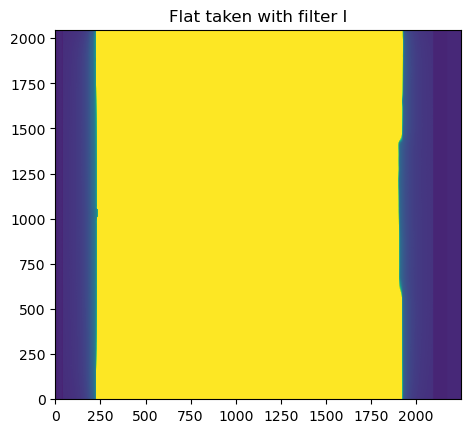

In [49]:
# Get file name.
file = 'lris0172.fits'
path = dir + file

# Open file and get name.
hdul = fits.open(path)
header = hdul[0].header 
filter = header['REDFILT']

# Display image.
raw_data = hdul['PRIMARY'].data.astype(float)
plt.imshow(raw_data, vmin=200, vmax=8000, origin='lower')
plt.title(f'Flat taken with filter {filter}')

# Close file.
hdul.close()

6. Identify the column indices that mark the boundaries of the two halves of the CCD (with different amplifiers). **Print out the indices corresponding to the edges of the left and right detectors. Display any plots you used to verify your results.**

In [50]:
# Loop through to find column of maximum contrast.
def find_boundary(raw_data, left, right):
    # Initialize variables to find location of maximum contrast.
    max_contrast = -1
    max_index = -1

    for i in range(left, right):
        # Select two columns of data.
        curr_col = raw_data[:,i]
        skip_col = raw_data[:,(i + 2)]

        # Compare contrast and update accordingly.
        curr_contrast = abs(np.average(skip_col) - np.average(curr_col))
        if curr_contrast > max_contrast:
            max_index = i + 1
            max_contrast = curr_contrast

    return max_index

The column index that marks the left boundary is 235.
The column index that marks the center boundary is 1066.
The column index that marks the right boundary is 1885.


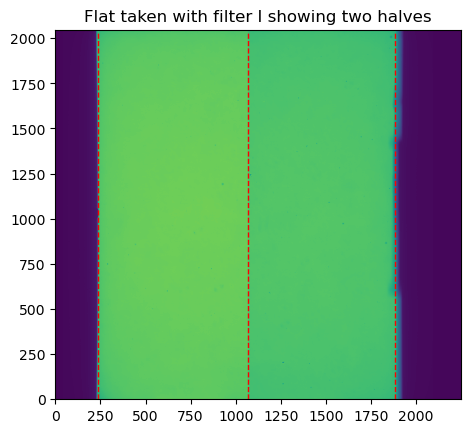

In [51]:
# This figure clearly shows the two halves of the CCD.
plt.imshow(raw_data, origin='lower')
plt.title(f'Flat taken with filter {filter} showing two halves')

# From the image, we can see the boundaries:
# Center detector.
centr_l = 1000
centr_r = 1250

# Left edge.
edge_l_l = 100
edge_l_r = 250

# Right edge.
edge_r_l = 1750
edge_r_r = 2000

# Run on boundary.
centr_bound = find_boundary(raw_data, centr_l, centr_r)
edge_l_bound = find_boundary(raw_data, edge_l_l, edge_l_r)
edge_r_bound = find_boundary(raw_data, edge_r_l, edge_r_r)

plt.plot([centr_bound, centr_bound], [0, 2040], '--', linewidth=1, color='red')
plt.plot([edge_l_bound, edge_l_bound], [0, 2040], '--', linewidth=1, color='red')
plt.plot([edge_r_bound, edge_r_bound], [0, 2040], '--', linewidth=1, color='red')

print(f'The column index that marks the left boundary is {edge_l_bound}.')
print(f'The column index that marks the center boundary is {centr_bound}.')
print(f'The column index that marks the right boundary is {edge_r_bound}.')

7. Identify the indices of the columns that contain the two overscan regions for each detector half. This is most easily done by displaying a median along the vertical axis. The overscan regions are the two stripes down the right side between roughly columns 2100 and 2250. The left overscan region has the combined bias and dark level for the left side of the detector, and the right overscan region has the combined bias and dark level for the right side of the detector. **Print out the indices corresponding to the edges of the overscan regions for the left and right detectors. Display any plots you used to verify your results.**

The column index that marks the left overscan region is 2090.
The column index that marks the right overscan region is 2170.


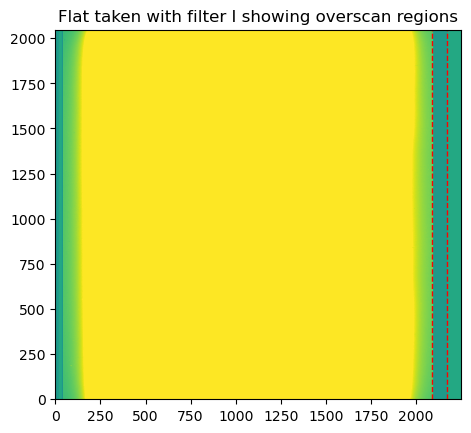

In [52]:
# This figure clearly shows the two overscan regions.
plt.imshow(raw_data, vmin=200, vmax=1700, origin='lower')
plt.title(f'Flat taken with filter {filter} showing overscan regions')

# Left overscan region.
left_l = 2000
left_r = 2125

# Right detector.
right_l = 2125
right_r = 2200

left_bound = find_boundary(raw_data, left_l, left_r)
right_bound = find_boundary(raw_data, right_l, right_r)

plt.plot([left_bound, left_bound], [0, 2045], '--', linewidth=1, color='red')
plt.plot([right_bound, right_bound], [0, 2045], '--', linewidth=1, color='red')

print(f'The column index that marks the left overscan region is {left_bound}.')
print(f'The column index that marks the right overscan region is {right_bound}.')

## Master Flats

8. Create a clean, normalized  "master flat" for each filter. For each individual flat image:<br><br>
&nbsp; &nbsp; &nbsp; &nbsp; 1\. Subtract the combined bias and dark level using the overscan regions,<br>
&nbsp; &nbsp; &nbsp; &nbsp; 2\. Crop out the un-illuminated region of the detector (trim the image down to just the two detectors),<br>
&nbsp; &nbsp; &nbsp; &nbsp; 3\. Median-combine all flat images (for the same filter), and<br>
&nbsp; &nbsp; &nbsp; &nbsp; 4\. Normalize the result (you can either normalize by the maximum value, the average value, or the median value).<br><br>

> **NOTE**<br>
> Make sure that all the flats you're using to make the master have the same exposure time! If they do not, you can divide by the exposure time before combining them. Also make sure you have viewed every image you're using and that they look as you expect. Log files and FITS headers are subject to human error and are often incorrect! For each flat, check that 
> 1. All flats taken with a given filter have roughly the same counts, 
> 2. Those counts are much higher than the bias level, and
> 3. There are no astronomical sources in the field.

In [53]:
# Finds average counts for all counts between left_bound and right_bound.
def find_avg_counts(data, left_bound, right_bound):
    avgs = []
    for i in range(left_bound, right_bound):
        avgs.append(np.average(data[:,i]))
    return np.average(avgs)

# Subtracts value from all counts between left_bound and right_bound.
def subtract_value(data, value, left_bound, right_bound):
    for i in range(left_bound, right_bound):
        data[:,i] -= value 

## R-Band Filter

(a) **Display your final normalized master flat for the first filter, including a colorbar. Title the plot with "Master Flat" and the filter name.**

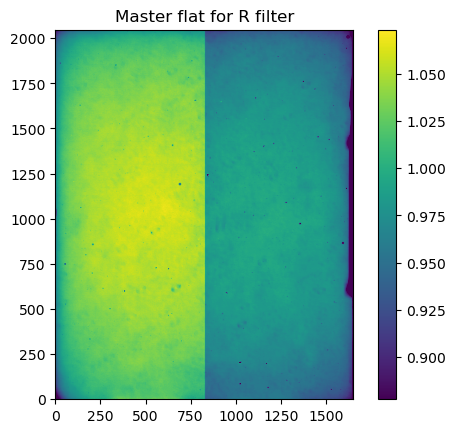

In [54]:
# Median-combine all flat images.
flat_r_data = []

# Iterate through files.
for path in files:
    curr_path = dir + path
    curr_file = fits.open(curr_path)
    header = curr_file[0].header
    
    obj_name = header['OBJECT']
    exp_time = header['EXPOSURE']
    if obj_name == 'domeflat R':
        curr_data = hdul['PRIMARY'].data.astype(float)
        curr_data = curr_data * (1/exp_time)
        flat_r_data.append(curr_data)

    curr_file.close()

# Create median datasets.
num_cols = len(flat_r_data[0])
master_flat_r = np.zeros_like(np.median(flat_r_data, axis=0))
np.median(flat_r_data, axis=0, out=master_flat_r)

# Find all boundaries for this image.
abs_left = 0
abs_right = 2248

crop_left = find_boundary(master_flat_r, 100, 250)
crop_right = find_boundary(master_flat_r, 1750, 2000)

ccd_split = find_boundary(master_flat_r, 1000, 1250)

overscan_left = find_boundary(master_flat_r, 2000, 2125)
overscan_right = find_boundary(master_flat_r, 2125, 2248)

# Calculate average bias and dark level using the two overscan regions.
bias_dark_l = find_avg_counts(master_flat_r, overscan_left, overscan_right)
bias_dark_r = find_avg_counts(master_flat_r, overscan_right, abs_right)

# Subtract the bias and dark level.
subtract_value(master_flat_r, bias_dark_l, edge_l_bound, centr_bound)
subtract_value(master_flat_r, bias_dark_l, centr_bound, edge_r_bound)

# Crop out the un-illuminated region.
master_flat_r = master_flat_r[:,edge_l_bound:edge_r_bound+1]

# Normalize entire image.
master_flat_r = master_flat_r/np.average(master_flat_r)

# Show figure without outliers.
img = plt.imshow(master_flat_r, origin='lower', vmin=np.percentile(master_flat_r, 1), vmax=np.percentile(master_flat_r, 99))
plt.title('Master flat for R filter')
plt.colorbar(img)

## I-Band Filter

(b) Repeat the procedure above for the I-band filter. (You can copy and paste your code, changing just the filter-specific components). **Display your final normalized master flat for the second filter, including a colorbar. Title the plot with "Master Flat" and the filter name.**

Text(0.5, 1.0, 'Master flat for I filter')

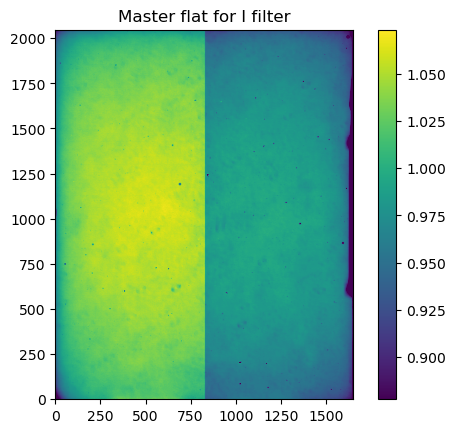

In [55]:
# Median-combine all flat images.
flat_i_data = []

# Iterate through files.
for path in files:
    curr_path = dir + path
    curr_file = fits.open(curr_path)
    header = curr_file[0].header
    
    obj_name = header['OBJECT']
    exp_time = header['EXPOSURE']
    filter = header['REDFILT']
    target_name = header['TARGNAME']
    if (target_name == 'HORIZON STOW') & (filter == 'I'):
        #print(path)
        curr_data = hdul['PRIMARY'].data.astype(float)
        curr_data = curr_data * (1/exp_time)
        flat_i_data.append(curr_data)

    curr_file.close()

# Create median datasets.
num_cols = len(flat_i_data[0])
master_flat_i = np.zeros_like(np.median(flat_i_data, axis=0))
np.median(flat_i_data, axis=0, out=master_flat_i)

# Find all boundaries for this image.
abs_left = 0
abs_right = 2248

crop_left = find_boundary(master_flat_i, 100, 250)
crop_right = find_boundary(master_flat_i, 1750, 2000)

ccd_split = find_boundary(master_flat_i, 1000, 1250)

overscan_left = find_boundary(master_flat_i, 2000, 2125)
overscan_right = find_boundary(master_flat_i, 2125, 2248)

# Calculate average bias and dark level using the two overscan regions.
bias_dark_l = find_avg_counts(master_flat_i, overscan_left, overscan_right)
bias_dark_r = find_avg_counts(master_flat_i, overscan_right, abs_right)

# Subtract the bias and dark level.
subtract_value(master_flat_i, bias_dark_l, edge_l_bound, centr_bound)
subtract_value(master_flat_i, bias_dark_l, centr_bound, edge_r_bound)

# Crop out the un-illuminated region.
master_flat_i = master_flat_i[:,edge_l_bound:edge_r_bound+1]

# Normalize entire image.
master_flat_i = master_flat_i/np.average(master_flat_i)

# Show figure.
img = plt.imshow(master_flat_i, origin='lower', vmin=np.percentile(master_flat_i, 1), vmax=np.percentile(master_flat_i, 99))
plt.colorbar(img)
plt.title('Master flat for I filter')

# Part III: Photometric Calibration

9. Display the data for one of the exposures of star SA 110-361 (also listed as TYC 447-508-1 on Simbad). Remove the overscan region and flat the data. **Display the data at three stages of reduction so you can see how it changes as each is applied.**

> **NOTE**<br>
> This star has different designations in different catalogs. SA means "Selected Area". TYC is the "Tycho Reference Catalogue".

In [56]:
def display_boundaries(raw_data):
  plt.imshow(raw_data, vmin=200, vmax=8000, origin='lower')
  plt.title(f'SA 110-361 taken with filter {filter}: Stage 1')
  plt.plot([crop_left, crop_left], [0, 2045], '--', linewidth=1, color='red')
  plt.plot([crop_right, crop_right], [0, 2045], '--', linewidth=1, color='red')
  plt.plot([ccd_split, ccd_split], [0, 2045], '--', linewidth=1, color='red')
  plt.plot([overscan_left, overscan_left], [0, 2045], '--', linewidth=1, color='red')
  plt.plot([overscan_right, overscan_right], [0, 2045], '--', linewidth=1, color='red')
  plt.show()

def subtract_bias(raw_data):
  # Calculate average bias and dark level using the two overscan regions in this image.
  bias_dark_l = find_avg_counts(raw_data, overscan_left, overscan_right)
  bias_dark_r = find_avg_counts(raw_data, overscan_right, abs_right)

  # Subtract the bias and dark level.
  subtract_value(raw_data, bias_dark_l, edge_l_bound, centr_bound)
  subtract_value(raw_data, bias_dark_r, centr_bound, edge_r_bound)

  return raw_data

def clean_img(file_name, master_flat_x):
    path = dir + file_name 

    hdul = fits.open(path)
    header = hdul[0].header 
    #filter = header['REDFILT']

    raw_data = hdul['PRIMARY'].data.astype(float)
    exp_time = header['EXPOSURE']

    subtract_bias(raw_data)

    # Crop out the un-illuminated region.
    raw_data = raw_data[:,edge_l_bound:edge_r_bound+1]
    raw_data = raw_data / exp_time

    # Flatfield image.
    raw_data = raw_data / master_flat_x
    # Close file.
    hdul.close()

    return raw_data

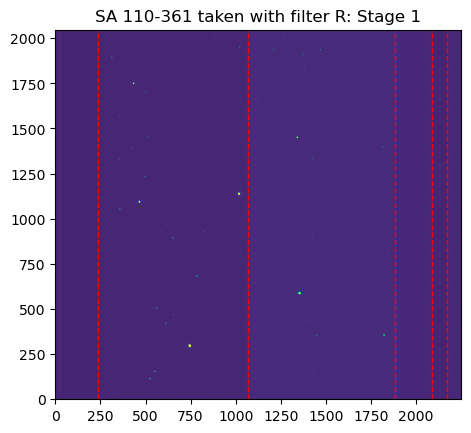

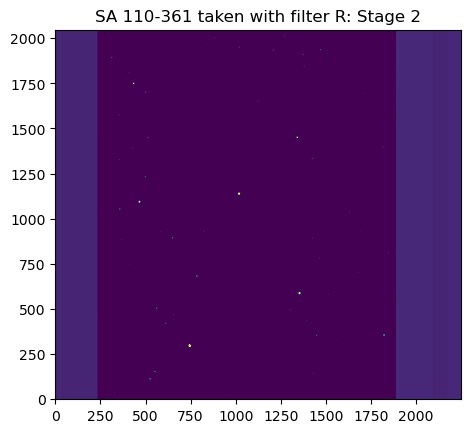

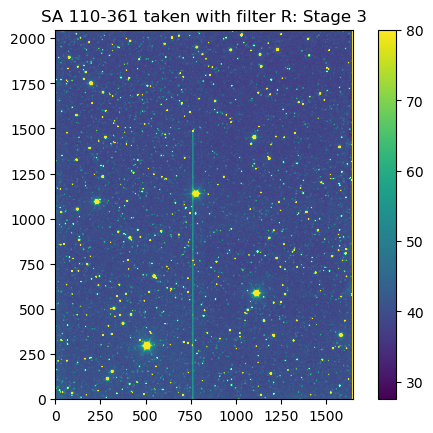

In [57]:
# Get file name.
file = 'lris0147.fits'
path = dir + file

# Open file and get name.
hdul = fits.open(path)
header = hdul[0].header 
filter = header['REDFILT']
raw_data = hdul['PRIMARY'].data.astype(float)

# Display boundaries.
display_boundaries(raw_data)

# Subtract bias.
subtract_bias(raw_data)
plt.imshow(raw_data, vmin=200, vmax=8000, origin='lower')
plt.title(f'SA 110-361 taken with filter {filter}: Stage 2')
plt.show()

# Crop out unilluminated region.
raw_data = raw_data[:,edge_l_bound:edge_r_bound+1]

# Flatfield data.
raw_data = raw_data / master_flat_r

# Display data.
img = plt.imshow(raw_data, vmin=np.percentile(raw_data, 1), vmax=np.percentile(raw_data, 99), origin='lower')
plt.title(f'SA 110-361 taken with filter {filter}: Stage 3')
plt.colorbar(img)
plt.show()

# Close file.
hdul.close()

10. Find the star on [Simbad](http://simbad.cds.unistra.fr) (you may have to search using its TYC designation). Use the chart to identify which star is SD 110-361 in your calibration image. Identify a second star and use the angular separation between SD 110-361 and the second star to determine the plate scale of the detector. **Print out the pixel scale in units of arcsec/pixel and the detector dimensions in arcminutes.**

In [58]:
# Calculate distance between two points.
def dist(x1, y1, x2, y2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

# SD 110-361 coordinates (via Simbad).
sd_110361 = SkyCoord('18 42 45 +00 08 04.70', unit=(u.hourangle, u.deg))
sd_110361_deg = [280.6875, 0.13463889]

# Lower left star coordinates.
second = SkyCoord('18 42 48.796 +00 05 07.94', unit=(u.hourangle, u.deg))
second_deg = [280.70331667, 0.08553889]

# Find angular separation in the sky.
ang_sep = astropy.coordinates.angular_separation(sd_110361_deg[0], sd_110361_deg[1], second_deg[0], second_deg[1])
#print(f'Angular separation is {ang_sep} degrees.')

# Find distance between two coordinates in image.
sd_110361_img_coord = [773, 1140]
second_img_coord = [500, 300]
img_dist = dist(sd_110361_img_coord[0], sd_110361_img_coord[1], second_img_coord[0], second_img_coord[1])
#print(f'Distance between two stars in the image is {img_dist} pixels.')

# Pixel scale in arcsec/pixel.
ang_sep_arcsec = ang_sep * 3600
pixel_scale = ang_sep_arcsec / img_dist
print(f'The pixel scale is {np.round(pixel_scale, 2)} arcseconds per pixel.')

# Detector dimensions.
img_dimensions = np.shape(raw_data)
det_dimensions = [(img_dimensions[1] / 60 * pixel_scale), (img_dimensions[0] / 60 * pixel_scale)]
print(f'The detector dimensions are {np.round(det_dimensions[0], 2)} arcminutes by {np.round(det_dimensions[1], 2)} arcminutes.')

The pixel scale is 0.21 arcseconds per pixel.
The detector dimensions are 5.78 arcminutes by 7.17 arcminutes.


11. For the flux calibration of the images, we will be using standard star SA 110-361. Get the star's V-band, R-band and I-band magnitude from [this](https://www.eso.org/sci/observing/tools/standards/Landolt.html) table. Then, express the magnitudes in flux densities with units of $\mathrm{W}\,\mathrm{m^{-2}}\,\mathrm{µ m^{-1}}$. Use the following zero-magnitude flux densities:<br><br>
$F_\mathrm{0,R} = 1.738\times 10^{-8}\,\mathrm{W}\,\mathrm{m^{-2}}\,\mathrm{µ m^{-1}}$<br>
$F_\mathrm{0,I} = 8.318\times 10^{-9}\,\mathrm{W}\,\mathrm{m^{-2}}\,\mathrm{µ m^{-1}}$<br>
You can solve for these using the definition of magnitudes:<br>
$m = -2.5\log_{10}\left(\frac{F}{F_0}\right)$<br>
**Print out the calibrated flux density of the star under the two filter bands.**

In [59]:
v_band_mag = 12.43
r_band_mag = 12.069
i_band_mag = 11.721

r_band_F0 = 1.738e-8
i_band_F0 = 8.318e-9

def get_flux(mag, F0):
    x = mag / -2.5
    return (np.power(10, x)) * F0

r_band_flux = get_flux(r_band_mag, r_band_F0)
i_band_flux = get_flux(i_band_mag, i_band_F0)

print(f'Under R-band, the calibrated flux density is {r_band_flux} (W m-2 um-1).')
print(f'Under I-band, the calibrated flux density is {i_band_flux} (W m-2 um-1).')

Under R-band, the calibrated flux density is 2.5849358641408684e-13 (W m-2 um-1).
Under I-band, the calibrated flux density is 1.7045859954006894e-13 (W m-2 um-1).


12. Use aperture photometry to determine the brightness of the star in both filters in units of counts/s. This will enable you to derive a conversion factor between counts/ and physical flux density that you can apply to your scientific targets.

In [60]:
def find_exact_center(data, apprx_centr_x, apprx_centr_y, apprx_size, show_plots):
    # Crop image and find its center coordinates.
    crop = [apprx_centr_x - apprx_size, apprx_centr_x + apprx_size, apprx_centr_y - apprx_size, apprx_centr_y + apprx_size]
    cropped_data = data[:,crop[0]:crop[1]]
    cropped_data = cropped_data[crop[2]:crop[3]]

    crop_centr_x, crop_centr_y = find_center_coords(cropped_data, show_plots)

    # Find center coordinates in regular image.
    reg_centr_x = crop[0] + crop_centr_x
    reg_centr_y = crop[2] + crop_centr_y

    return [cropped_data, [crop_centr_x, crop_centr_y], [reg_centr_x, reg_centr_y]]

def find_center_coords(data, show_plots):
    # Create Gaussian filter.
    r_gauss = scipy.ndimage.gaussian_filter(data, sigma=1)

    # Average along x-indices.
    avg_r_gauss_x = []
    avg_r_gauss_x = np.mean(r_gauss, axis=0, dtype=np.float64)

    # Average along the y-indices.
    avg_r_gauss_y = []
    avg_r_gauss_y = np.mean(r_gauss, axis=1, dtype=np.float64)

    if show_plots: 
        plt.plot(avg_r_gauss_x)
        plt.title('Gaussian filter applied to cropped image (y)')
        plt.show()

        plt.plot(avg_r_gauss_y)
        plt.title('Gaussian filter applied to cropped image (x)')
        plt.show()

    # Figure out coordinates of star using Gaussian.
    centr_x = np.argmax(avg_r_gauss_x)
    centr_y = np.argmax(avg_r_gauss_y)

    return centr_x, centr_y

## R-Band Filter

(a) Reduce the SD 110-361 the science data for the R-band filter. **Print out the pixel coordinates of the center of the standard star SD 110-361. Display the data and show the position on the detector image.**

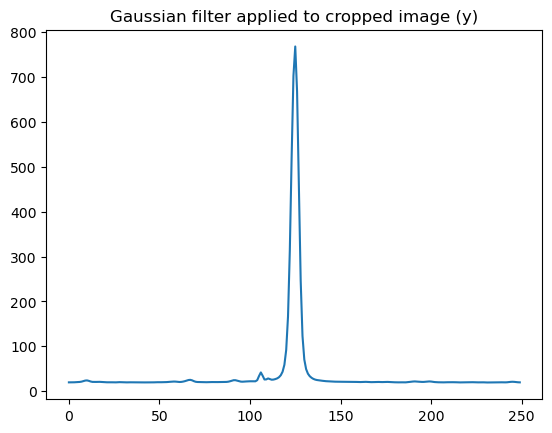

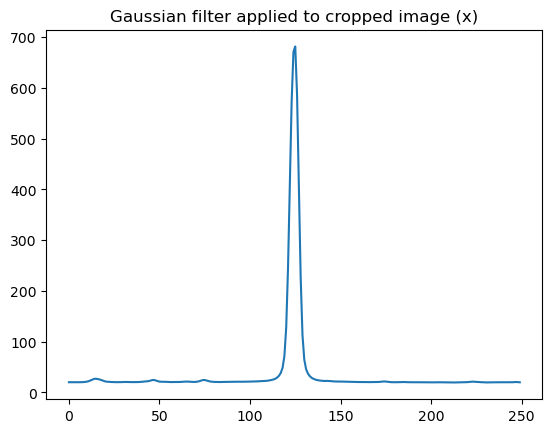

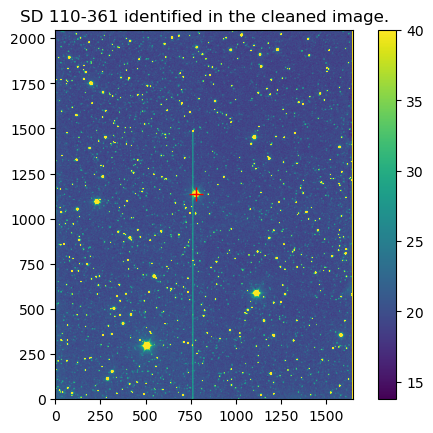

In the cleaned image, star's center coordinates are (782, 1137).


In [61]:
r_band_data = clean_img('lris0147.fits', master_flat_r)

[r_band_cropped_data, crop_centr, reg_centr] = find_exact_center(r_band_data, 782, 1137, 125, True)

crop_centr_x = crop_centr[0]
crop_centr_y = crop_centr[1]

reg_centr_x = reg_centr[0]
reg_centr_y = reg_centr[1]

# Display cropped image.
img = plt.imshow(r_band_data, vmin=np.percentile(r_band_data, 1), vmax=np.percentile(r_band_data, 99), origin='lower')
plt.plot(reg_centr_x, reg_centr_y, 'r+', markersize=10)
plt.title("SD 110-361 identified in the cleaned image.")
plt.colorbar()
plt.show()

print(f'In the cleaned image, star\'s center coordinates are {reg_centr_x, reg_centr_y}.')

(b) Perform aperture photometry on the standard star to determine its brightness in units of counts/s. You'll want to plot counts/s vs. inner radius to show where the curve levels off to justify the radius value you've chosen. You'll want to do the same for the median of the background for the same justification reasons. **Display both plots and print out the R-band flux calibration in units of $(\mathbf{W}\,\mathbf{m^{-2}}\,\mathbf{µ m^{-1}})/(\mathbf{counts}\,\mathbf{s^{-1}})$.**

> **CAUTION**<br>
> When choosing your three radii for aperture photometry, first explore the outer two radii, making sure the chosen background annulus does not contain significant flux from the star. Make sure to divide your data by the exposure time in the header to convert your data to counts/s.

In [62]:
def sum_counts_radii(data, centr_x, centr_y):
    # Create meshgrid of data.
    (x, y) = np.mgrid[0:data.shape[0], 0:data.shape[1]]

    # Calculate distances from center.
    distances = np.sqrt((x-centr_x)**2 + (y-centr_y)**2 )
    max_distance = round(np.max(distances))

    # Calculate sum of all counts within a circle of that distance.
    d_counts = []
    for d in range(max_distance):
        masked_img = np.ma.array(data, mask=(distances > d))
        sumcounts = np.sum(masked_img)
        d_counts.append(sumcounts)

    return (distances, d_counts)

def median_counts_radii(data, centr_x, centr_y):
    # Create meshgrid of cropped image.
    (x, y) = np.mgrid[0:data.shape[0], 0:data.shape[1]]

    # Calculate distances from center.
    distances = np.sqrt((x-centr_x)**2 + (y-centr_y)**2)
    max_distance = round(np.max(distances))

    # Calculate median of all counts within a circle of that distance.
    d_meds = []

    for d in range(max_distance):
        masked_crop_img = np.ma.array(data, mask=((distances < 2*d) | (distances > 3*d)))
        medians = np.ma.median(masked_crop_img)
        d_meds.append(medians)

    return (distances, d_meds)

def get_signal_counts(data, distances, inner_radius, annulus_r1, annulus_r2):
    star = np.ma.array(data, mask=(distances > 25))
    annulus = np.ma.array(data, mask=((distances < 50) | (distances > 75)))
    annulus_counts = np.ma.median(annulus)

    # Calculate total star counts.
    star_counts = np.sum(star)

    # Calculate total background noise.
    star_pixels = np.ma.count(star) # count non-masked pixels
    bg_counts = star_pixels * annulus_counts

    return (star_counts - bg_counts)

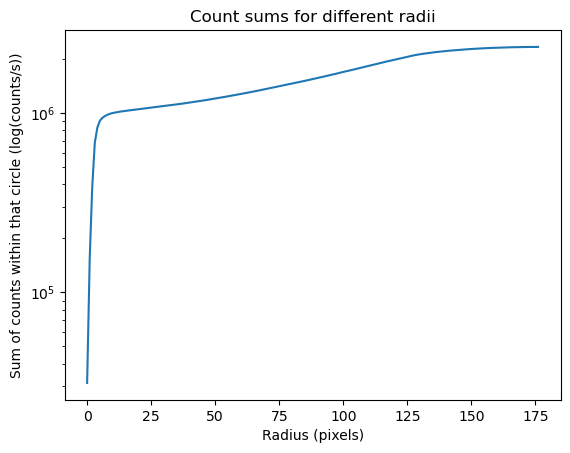

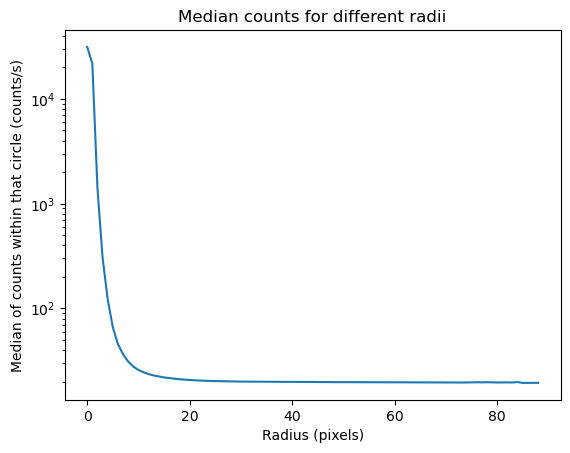

The R-band flux calibration is 2.50969538666705e-19 (W m-2 um-1) per (counts per second).


In [63]:
# FIND SUM OF COUNTS FOR RADII (FOR STAR).
(distances, d_counts) = sum_counts_radii(r_band_cropped_data, crop_centr_x, crop_centr_y)
# Show plot.
plt.plot(d_counts)
plt.yscale('log')
plt.title("Count sums for different radii")
plt.xlabel("Radius (pixels)")
plt.ylabel("Sum of counts within that circle (log(counts/s))")
plt.show()

# FIND MEDIAN COUNTS FOR RADII (FOR BACKGROUND).
(distances, d_meds) = median_counts_radii(r_band_cropped_data, crop_centr_x, crop_centr_y)
# Show plot.
plt.plot(d_meds)
plt.yscale('log')
plt.title("Median counts for different radii")
plt.xlabel("Radius (pixels)")
plt.ylabel("Median of counts within that circle (counts/s)")
plt.show() 

# DETERMINE BOUNDARIES.
inner_radius = 25
annulus_r1 = 50 
annulus_r2 = 75

# CALCULATE FLUX.
r_flux = 2.5849358641408684e-13

signal_counts = get_signal_counts(r_band_cropped_data, distances, inner_radius, annulus_r1, annulus_r2)

r_flux_calib = r_flux / signal_counts
print(f'The R-band flux calibration is {r_flux_calib} (W m-2 um-1) per (counts per second).')

## I-Band Filter

(c) Repeat for the I-band filter. Note that the standard star may not be at the exact same location between filters. **Print out the pixel coordinates of the center of the standard star SD 110-361. Display the data and show the position on the detector image.**

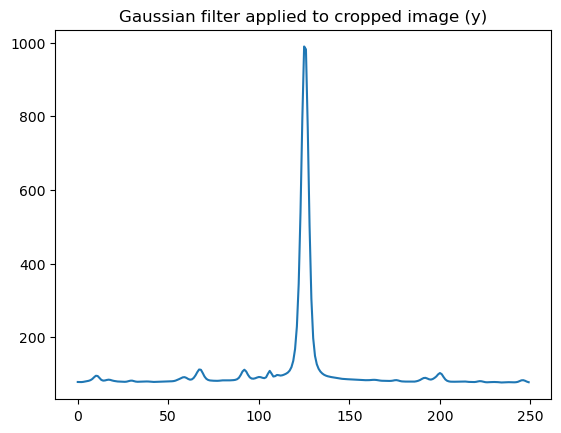

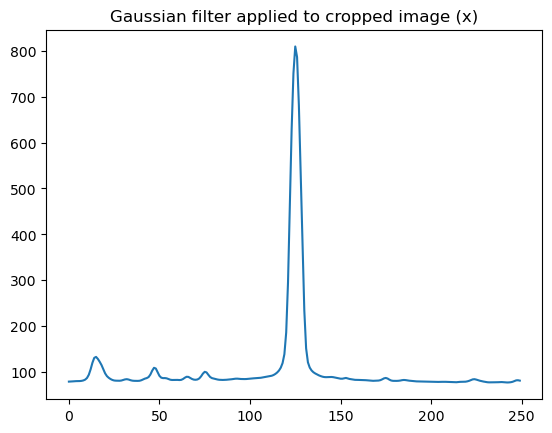

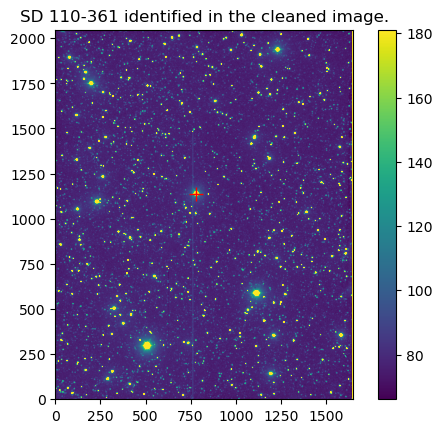

In the cleaned image, star's center coordinates are (782, 1137).


In [64]:
i_band_data = clean_img('lris0148.fits', master_flat_i)

[i_band_cropped_data, crop_centr, reg_centr] = find_exact_center(i_band_data, 782, 1137, 125, True)

crop_centr_x = crop_centr[0]
crop_centr_y = crop_centr[1]

reg_centr_x = reg_centr[0]
reg_centr_y = reg_centr[1]

# Display cropped image.
img = plt.imshow(i_band_data, vmin=np.percentile(i_band_data, 1), vmax=np.percentile(i_band_data, 99), origin='lower')
plt.plot(reg_centr_x, reg_centr_y, 'r+', markersize=10)
plt.title("SD 110-361 identified in the cleaned image.")
plt.colorbar()
plt.show()

print(f'In the cleaned image, star\'s center coordinates are {reg_centr_x, reg_centr_y}.')

(d) Perform the same aperture photometry, but now with the I-band filter. **Display both plots and print out the R-band flux calibration in units of $[(\mathrm{W}\,\mathrm{m^{-2}}\,\mathrm{µ m^{-1}})/(\mathrm{counts}\,\mathrm{s^{-1}})]$.**

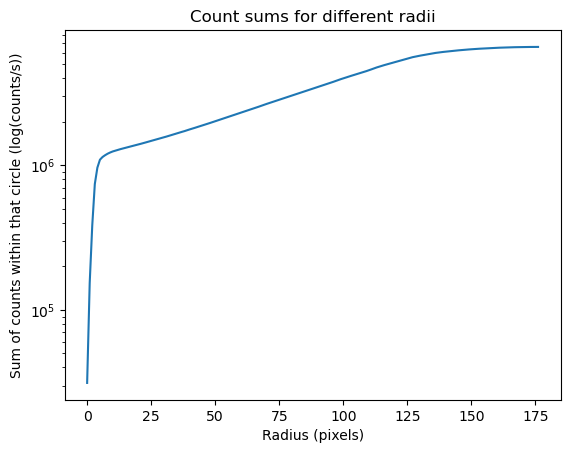

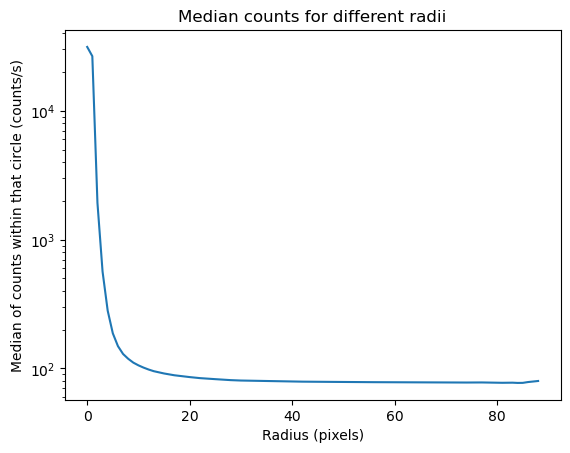

The I-band flux calibration is 1.2941900811513915e-19 (W m-2 um-1) per (counts per second).


In [65]:
# FIND SUM OF COUNTS FOR RADII (FOR STAR).
(distances, d_counts) = sum_counts_radii(i_band_cropped_data, crop_centr_x, crop_centr_y)
# Show plot.
plt.plot(d_counts)
plt.yscale('log')
plt.title("Count sums for different radii")
plt.xlabel("Radius (pixels)")
plt.ylabel("Sum of counts within that circle (log(counts/s))")
plt.show()

# FIND MEDIAN COUNTS FOR RADII (FOR BACKGROUND).
(distances, d_meds) = median_counts_radii(i_band_cropped_data, crop_centr_x, crop_centr_y)
# Show plot.
plt.plot(d_meds)
plt.yscale('log')
plt.title("Median counts for different radii")
plt.xlabel("Radius (pixels)")
plt.ylabel("Median of counts within that circle (counts/s)")
plt.show() 

# DETERMINE BOUNDARIES.
inner_radius = 25
annulus_r1 = 50 
annulus_r2 = 75

# CALCULATE FLUX.
i_flux = 1.7045859954006894e-13

signal_counts = get_signal_counts(i_band_cropped_data, distances, inner_radius, annulus_r1, annulus_r2)

i_flux_calib = i_flux / signal_counts
print(f'The I-band flux calibration is {i_flux_calib} (W m-2 um-1) per (counts per second).')

# Part IV: Scientific Data Analysis

We will be using the science data for the reflection nebula NGC 7129. Start by displaying a couple of the images to see how they differ. The images have different exposure times, so converting your data to flux by dividing by the exposure time will make the frames comparable. You will need to make sure the stars you are using for this part are not saturated. Using the shorter exposure time images will allow you to measure brighter stars, while the longer exposure times will allow you to measure the fainter stars.

To orient yourself to the field, find a picture of star-forming region NGC 7219 online (for example, [here](https://noirlab.edu/public/images/noao-ngc7129/).) Orient yourself to which part of the nebula your data is of. You may want to look at the header keywords:
`ROTMODE` is the "position angle" and means rotation angle of the image east of north. `ROTPPOSN` is the value of the rotation angle.

13. **Display the data for each of the filters and each of the exposure times. Title the plot with the filter name.**

In [66]:
def get_exposure(path):
    f = fits.open(dir + path)
    header = f[0].header 
    exp_time = header['EXPOSURE']
    f.close()
    return exp_time

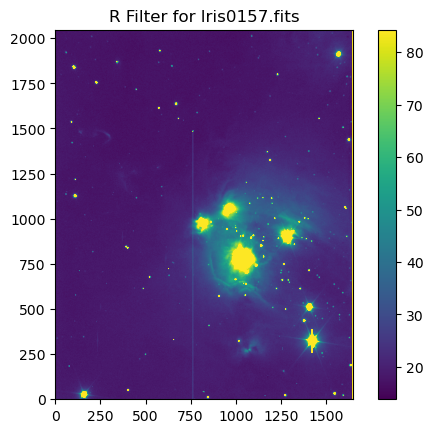

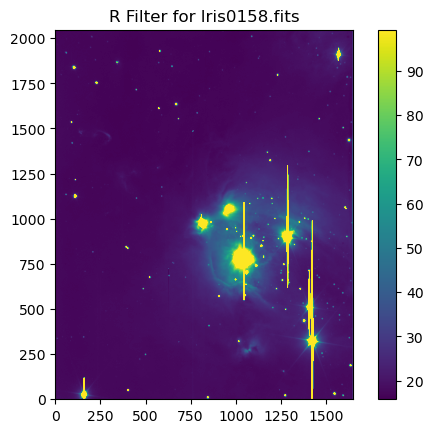

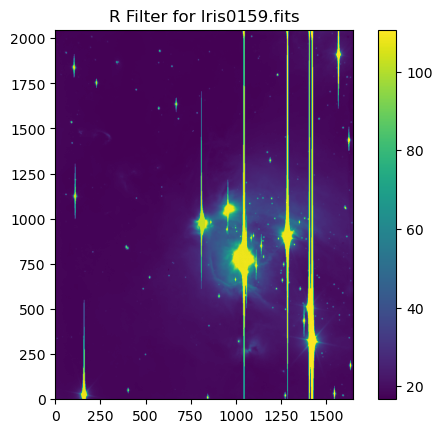

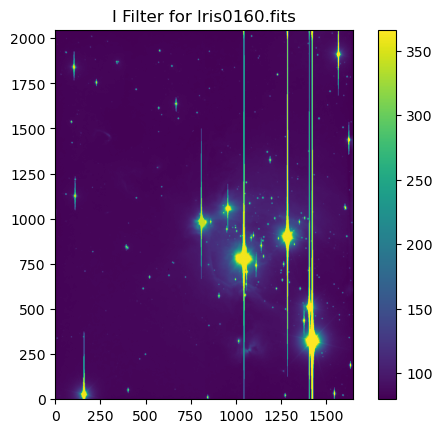

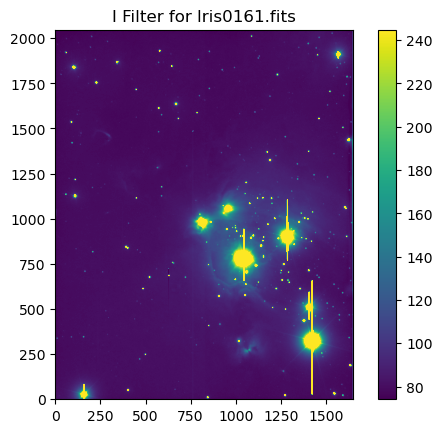

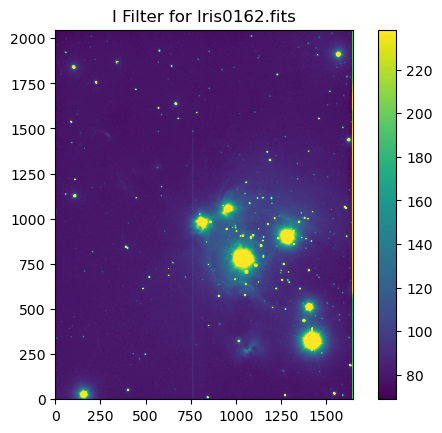

In [67]:
ngc_files_r = ['lris0157.fits', 'lris0158.fits', 'lris0159.fits']
ngc_files_i = ['lris0160.fits', 'lris0161.fits', 'lris0162.fits']

# Display images and exposure times.
for path in ngc_files_r:
    # Get exposure.
    exp_time = get_exposure(path)
    curr_data = clean_img(path, master_flat_r)

    img = plt.imshow(curr_data, vmin=np.percentile(curr_data, 1), vmax=np.percentile(curr_data, 99), origin='lower')
    plt.title(f'R Filter for {path}')
    plt.colorbar()
    plt.show()

for path in ngc_files_i:
    # Get exposure.
    exp_time = get_exposure(path)
    curr_data = clean_img(path, master_flat_i)

    img = plt.imshow(curr_data, vmin=np.percentile(curr_data, 1), vmax=np.percentile(curr_data, 99), origin='lower')
    plt.title(f'I Filter for {path}')
    plt.colorbar()
    plt.show()

14. Choose 5 stars within the image. Find the center coordinates for each of the stars you've selected. **Show their position on the science image you selected for the R-band filter.**

(1047, 778)
(811, 985)
(957, 1055)
(1288, 896)
(1425, 322)


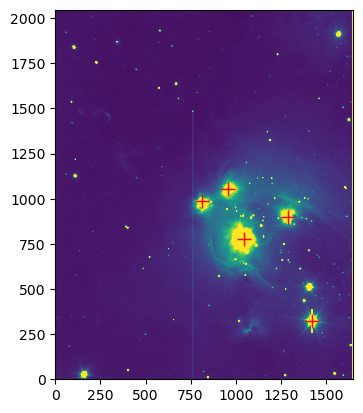

In [68]:
ngc_r_path = 'lris0157.fits'
ngc_r_data = clean_img(ngc_r_path, master_flat_r)

apx_star_centers = [[1030, 780, 150], [810, 975, 100], [960, 1060, 100], [1280, 910, 100], [1415, 330, 150]]
cropped_star_data = []
cropped_centrs = []
reg_centrs = []

for apx in apx_star_centers:
    [data, cropcentr, regcentr] = find_exact_center(ngc_r_data, apx[0], apx[1], apx[2], False)
    cropped_star_data.append(data)
    cropped_centrs.append(cropcentr)
    reg_centrs.append(regcentr)

img = plt.imshow(ngc_r_data, vmin=np.percentile(ngc_r_data, 1), vmax=np.percentile(ngc_r_data, 99), origin='lower')

for centr in reg_centrs:
    plt.plot(centr[0], centr[1], 'r+', markersize=10)
    print(f'({centr[0]}, {centr[1]})')

15. For each star you've chosen, display plots of counts/s vs. aperture radius in pixels.

## R-Band Filter

(a) Choose a justifiable radius for each star, then calculate its brightness in counts/s and calibrate it with your R-band calibration factor. **Display plots of the aperture sums and median background vs. inner radius and print out the calibrated flux density.**


---------------------------------- STAR 1 -----------------------------------



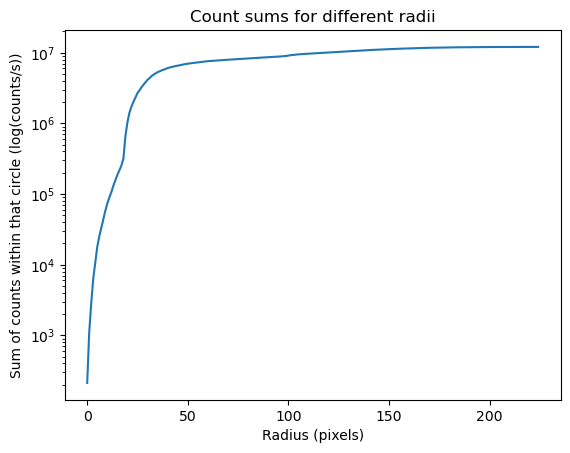

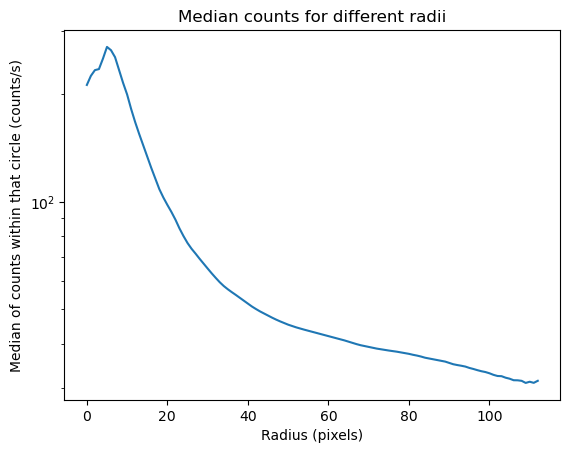

The calibrated flux density is 6.387298508249618e-13 W m-2 um-1.

---------------------------------- STAR 2 -----------------------------------



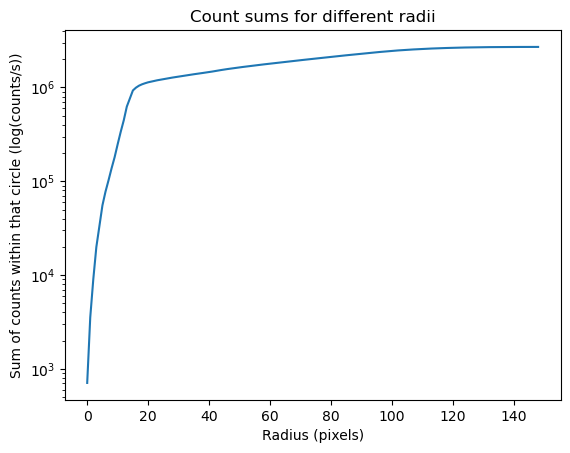

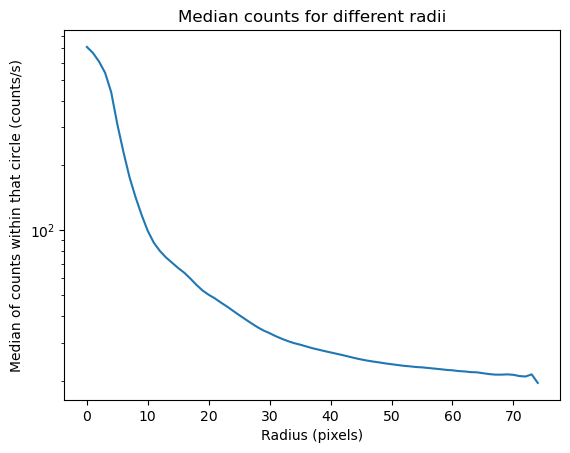

The calibrated flux density is 2.8814490642389304e-13 W m-2 um-1.

---------------------------------- STAR 3 -----------------------------------



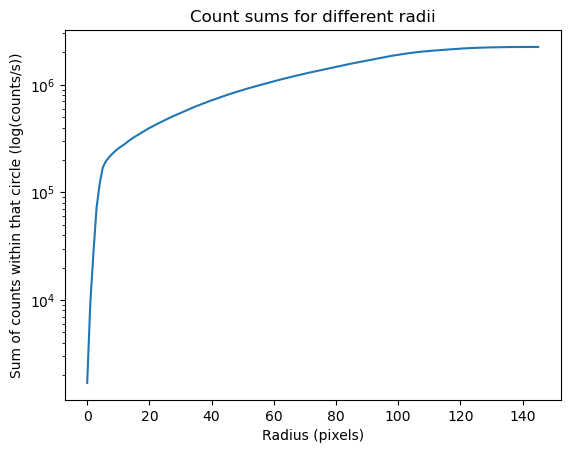

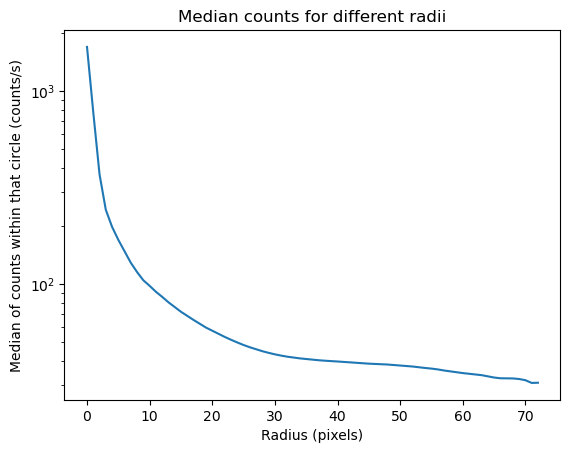

The calibrated flux density is 9.410273553024008e-14 W m-2 um-1.

---------------------------------- STAR 4 -----------------------------------



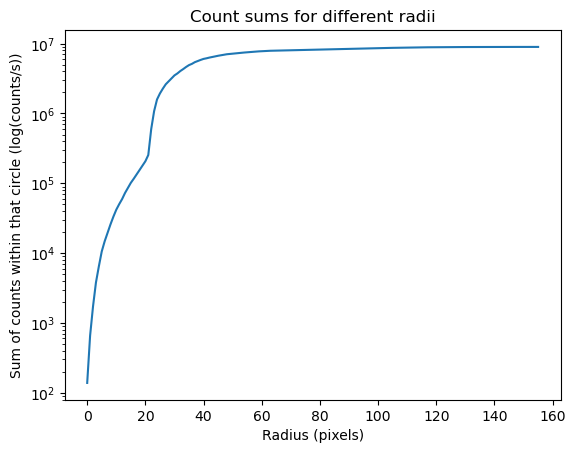

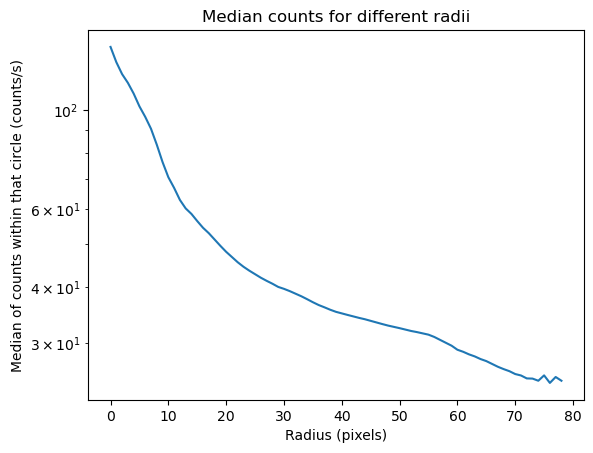

The calibrated flux density is 4.648125772914459e-13 W m-2 um-1.

---------------------------------- STAR 5 -----------------------------------



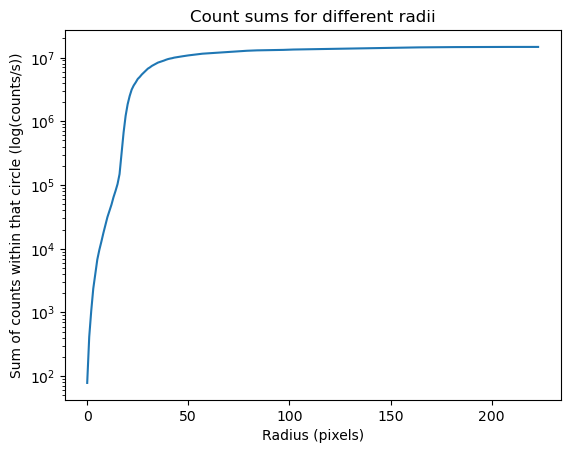

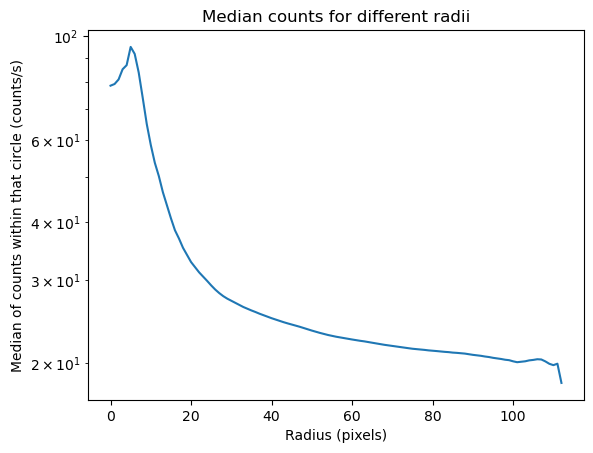

The calibrated flux density is 1.1443419916081431e-12 W m-2 um-1.


In [69]:
star_radii = [[50, 100, 150], [30, 60, 90], [30, 60, 90], [50, 100, 150], [50, 80, 120]]
r_flux_densities = []

for i in range(5):
    print(f'\n---------------------------------- STAR {i+1} -----------------------------------\n')
    data = cropped_star_data[i]

    (distances, d_counts) = sum_counts_radii(data, cropped_centrs[i][0], cropped_centrs[i][1])
    # Show plot.
    plt.plot(d_counts)
    plt.yscale('log')
    plt.title("Count sums for different radii")
    plt.xlabel("Radius (pixels)")
    plt.ylabel("Sum of counts within that circle (log(counts/s))")
    plt.show()

    (distances, d_meds) = median_counts_radii(data, cropped_centrs[i][0], cropped_centrs[i][1])
    # Show plot.
    plt.plot(d_meds)
    plt.yscale('log')
    plt.title("Median counts for different radii")
    plt.xlabel("Radius (pixels)")
    plt.ylabel("Median of counts within that circle (counts/s)")
    plt.show()

    #star_data = np.ma.array(cropped_star_data[i], mask=(distances > star_radii[i][0]))
    #star_img = plt.imshow(star_data, origin='lower', vmin=np.percentile(cropped_star_data[i], 1), vmax=np.percentile(cropped_star_data[i], 99))
    #plt.show()
    #masked_data = np.ma.array(cropped_star_data[i], mask=((distances < star_radii[i][1]) | (distances > star_radii[i][2])))
    #masked_img = plt.imshow(masked_data, origin='lower', vmin=np.percentile(cropped_star_data[i], 1), vmax=np.percentile(cropped_star_data[i], 99))
    #plt.show()

    signal_counts = get_signal_counts(data, distances, star_radii[i][0], star_radii[i][1], star_radii[i][2])
    calib_flux_density = signal_counts * r_flux_calib
    r_flux_densities.append(calib_flux_density)
    print(f'The calibrated flux density is {calib_flux_density} W m-2 um-1.')

## I-Band Filter

(b) Repeat for the I-band filter. **Display plots of the aperture sums and median background vs. inner radius and print out the calibrated flux density.**


---------------------------------- STAR 1 -----------------------------------



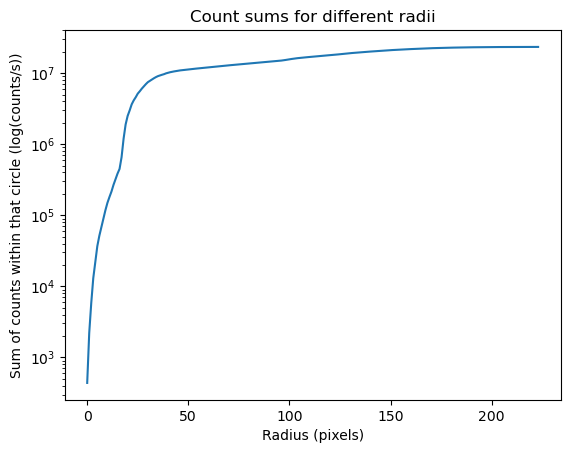

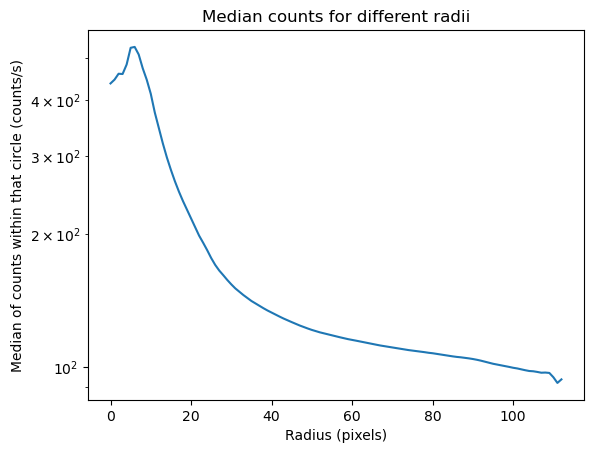

The calibrated flux density is 6.221218629622608e-13 W m-2 um-1.

---------------------------------- STAR 2 -----------------------------------



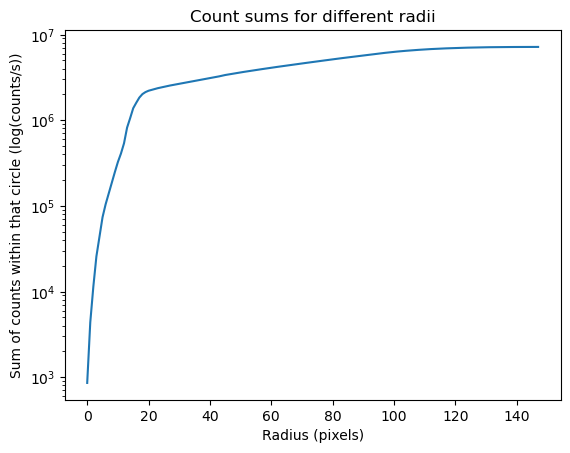

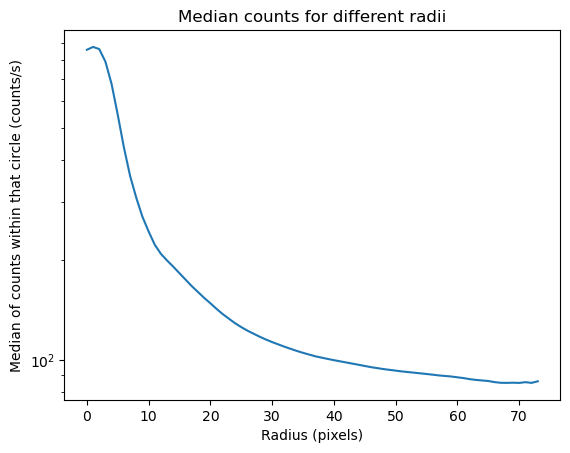

The calibrated flux density is 2.856651537812215e-13 W m-2 um-1.

---------------------------------- STAR 3 -----------------------------------



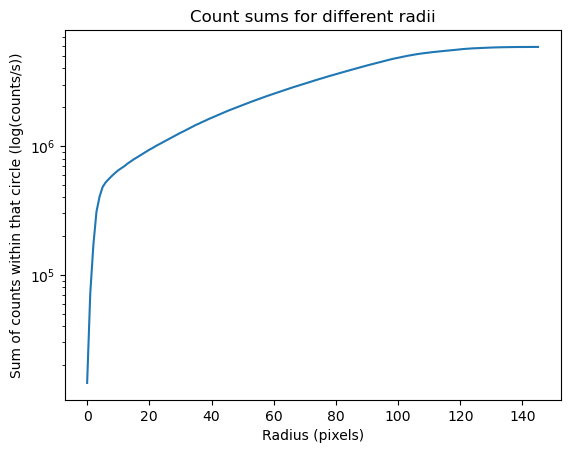

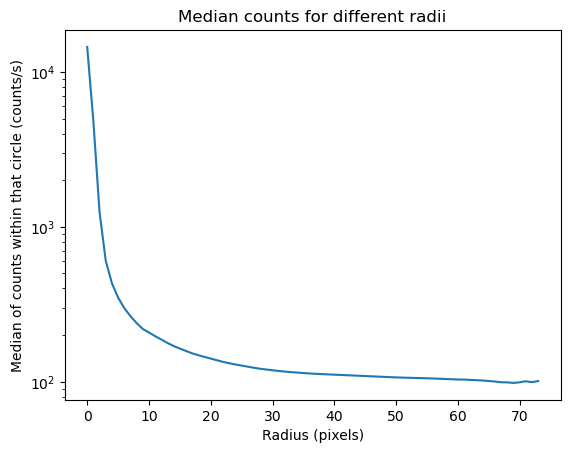

The calibrated flux density is 1.0927799950590434e-13 W m-2 um-1.

---------------------------------- STAR 4 -----------------------------------



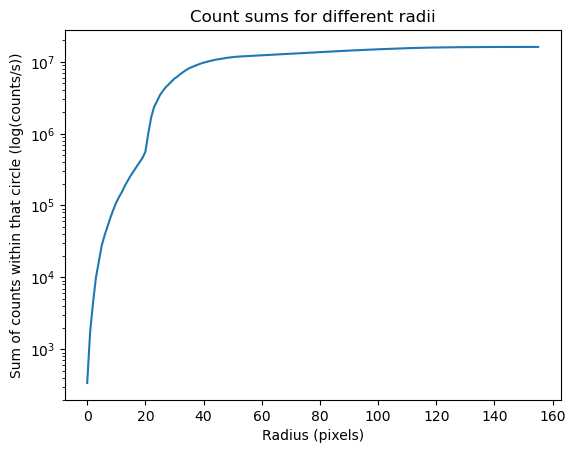

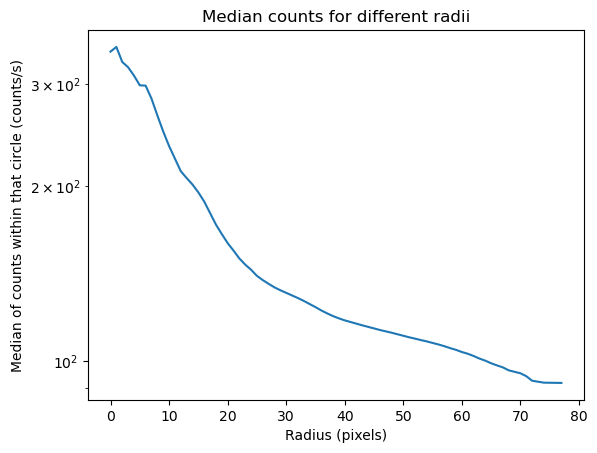

The calibrated flux density is 4.072601899229827e-13 W m-2 um-1.

---------------------------------- STAR 5 -----------------------------------



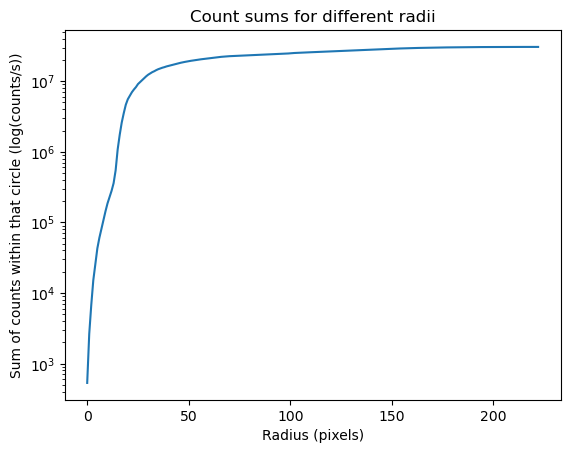

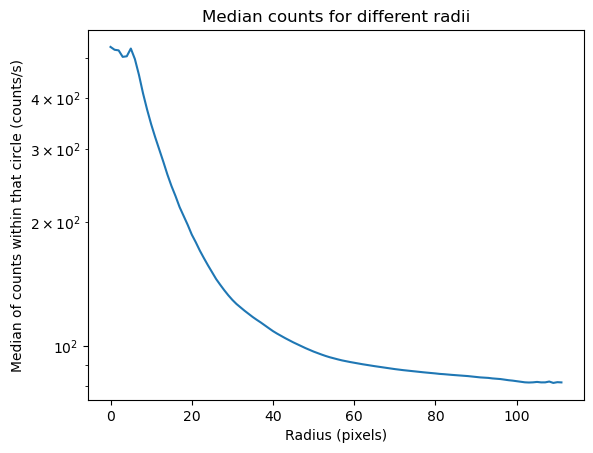

The calibrated flux density is 1.140194681980403e-12 W m-2 um-1.


In [70]:
ngc_i_path = 'lris0162.fits'
ngc_i_data = clean_img(ngc_i_path, master_flat_i)
i_flux_densities = []

apx_star_centers = [[1030, 780, 150], [810, 975, 100], [960, 1060, 100], [1280, 910, 100], [1415, 330, 150]]
cropped_star_data = []
cropped_centrs = []
reg_centrs = []

for apx in apx_star_centers:
    [data, cropcentr, regcentr] = find_exact_center(ngc_i_data, apx[0], apx[1], apx[2], False)
    cropped_star_data.append(data)
    cropped_centrs.append(cropcentr)
    reg_centrs.append(regcentr)

star_radii = [[50, 100, 150], [30, 60, 90], [30, 60, 90], [50, 100, 150], [50, 100, 150]]

for i in range(5):
    print(f'\n---------------------------------- STAR {i+1} -----------------------------------\n')
    data = cropped_star_data[i]

    (distances, d_counts) = sum_counts_radii(data, cropped_centrs[i][0], cropped_centrs[i][1])
    # Show plot.
    plt.plot(d_counts)
    plt.yscale('log')
    plt.title("Count sums for different radii")
    plt.xlabel("Radius (pixels)")
    plt.ylabel("Sum of counts within that circle (log(counts/s))")
    plt.show()

    (distances, d_meds) = median_counts_radii(data, cropped_centrs[i][0], cropped_centrs[i][1])
    # Show plot.
    plt.plot(d_meds)
    plt.yscale('log')
    plt.title("Median counts for different radii")
    plt.xlabel("Radius (pixels)")
    plt.ylabel("Median of counts within that circle (counts/s)")
    plt.show()

    signal_counts = get_signal_counts(data, distances, star_radii[i][0], star_radii[i][1], star_radii[i][2])
    calib_flux_density = signal_counts * i_flux_calib
    i_flux_densities.append(calib_flux_density)
    print(f'The calibrated flux density is {calib_flux_density} W m-2 um-1.')

16. **Display a plot containing the flux density of each star under the two filters. Scatter plot the calibrated flux density against the filter wavelength. Each star should be labeled, the plot should have a legend (or other indication of which point is which star), and the axes should have units and labels.**

You may have to look up the central wavelengths of the two filters. [This](https://en.wikipedia.org/wiki/Photometric_system) Wikipedia page may be useful.


----------------------- PLOTS ----------------------- 


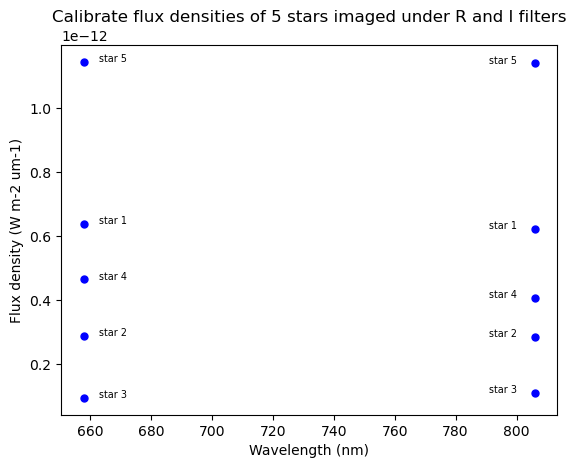


----------------------- LABELED STARS ----------------------- 


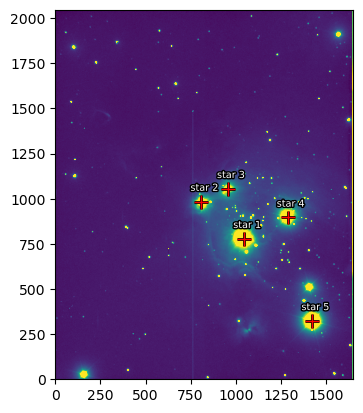

In [71]:
r_wavelength = 658 #nm
i_wavelength = 806 #nm

print('\n----------------------- PLOTS ----------------------- ')
for i in range(5):
    plt.plot(r_wavelength, r_flux_densities[i], 'bo', markersize=5)
    plt.text(r_wavelength + 5, r_flux_densities[i], f'star {i+1}', color='black', fontsize='x-small')
    plt.plot(i_wavelength, i_flux_densities[i], 'bo', markersize=5)
    plt.text(i_wavelength - 15, i_flux_densities[i], f'star {i+1}', color='black', fontsize='x-small')
plt.title('Calibrate flux densities of 5 stars imaged under R and I filters')
plt.xlabel('Wavelength (nm)')
plt.ylabel("Flux density (W m-2 um-1)")
plt.show()

print('\n----------------------- LABELED STARS ----------------------- ')
img = plt.imshow(ngc_i_data, vmin=np.percentile(ngc_i_data, 1), vmax=np.percentile(ngc_i_data, 99), origin='lower')
for i in range(len(reg_centrs)):
    centr = reg_centrs[i]
    plt.plot(centr[0], centr[1], 'r+', markersize=10, path_effects=[pe.withStroke(linewidth=2, foreground='black')])
    plt.text(centr[0] - 60, centr[1] + 60, f'star {i+1}', color='white', fontsize='x-small', path_effects=[pe.withStroke(linewidth=2, foreground='black')])
plt.show() 

17. **Create a color-magnitude diagram of your chosen stars, with color (the difference in magnitudes between the two filters) on the horizontal axis and the magnitude in one of the filters on the vertical axis.** Based on your plot, can you determine which of your chosen stars belong to the cluster?

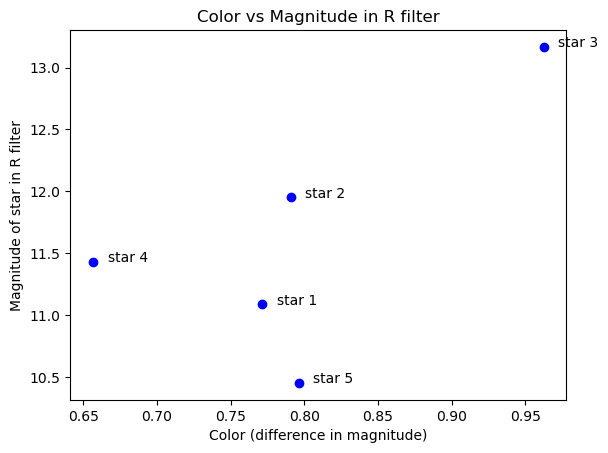

It looks like star 3 is the outlier, with stars 1, 2, 4, and 5 in the cluster.


In [73]:
def get_magnitude(flux, filter):
    if filter == 'r':
        F0 = r_band_F0
    elif filter == 'i':
        F0 = i_band_F0
    mag = -2.5*(np.log10(flux / F0))
    return mag

r_magnitudes = []
i_magnitudes = []
colors = []

for i in range(len(r_flux_densities)):
    r_flux = r_flux_densities[i]
    r_magnitudes.append(get_magnitude(r_flux, 'r'))

    i_flux = i_flux_densities[i]
    i_magnitudes.append(get_magnitude(i_flux, 'i'))

colors = np.array(r_magnitudes) - np.array(i_magnitudes)
for i in range(len(colors)):
    plt.plot(colors[i], r_magnitudes[i], 'bo')
    plt.text(colors[i] + 0.01, r_magnitudes[i], f'star {i+1}', color='black')

plt.title('Color vs Magnitude in R filter')
plt.xlabel('Color (difference in magnitude)')
plt.ylabel('Magnitude of star in R filter')
plt.show()

print('It looks like star 3 is the outlier, with stars 1, 2, 4, and 5 in the cluster.')

18. How much time did you spent working on this problem set (including time spent in office hours)?

In [74]:
# About 20 hours.

These data are published in [Dahm and Hillenbrand (2015)](https://iopscience.iop.org/article/10.1088/0004-6256/149/6/200/pdf). You can find the full color-magnitude diagram (including many more sources than your analysis) in figure 3.